In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_excel('https://mth522.wordpress.com/wp-content/uploads/2024/03/us-violence-brief-1.xls')
data.columns = data.columns.str.lower()
data

,year,month,day,latitude,longitude,fatalities
0,2020,1,27,38.8137,-76.9453,1
1,2020,1,28,40.0444,-111.7320,0
2,2020,1,31,30.3674,-89.0928,1
3,2020,2,1,33.9375,-117.2310,1
4,2020,2,4,35.0887,-92.4421,1
...,...,...,...,...,...,...
1811,2023,12,20,30.4473,-91.1890,0
1812,2023,12,23,37.7793,-122.4190,0
1813,2023,12,25,40.7834,-73.9663,0
1814,2023,12,27,34.0395,-118.4400,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data based on the year
train_data = data[(data['year'] == 2020) | (data['year'] == 2021) | (data['year'] == 2022)]
test_data = data[data['year'] == 2023]

# Separate features and target variable for training and testing sets
X_train = train_data[['year', 'month', 'day', 'latitude', 'longitude']]
y_train = train_data['fatalities']
X_test = test_data[['year', 'month', 'day', 'latitude', 'longitude']]
y_test = test_data['fatalities']

In [ ]:
# Define a custom distance metric
def custom_distance(point1, point2):
    """
    Calculates a weighted distance between two points.
    """
    # Time-based weights: year, month, day
    time_distance = abs(point1[0] - point2[0]) * 365 + abs(point1[1] - point2[1]) * 30 + abs(point1[2] - point2[2])

    # Location-based weights: latitude and longitude
    geo_distance = np.sqrt((point1[3] - point2[3])**2 + (point1[4] - point2[4])**2)

    # Combine distances with scaling factors
    return time_distance + geo_distance * 100  # Adjust scaling for time vs. location sensitivity

In [ ]:
# Create a custom KNN class with the custom distance metric
class CustomKNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()

    def predict(self, X_test):
        predictions = []
        for test_point in X_test.to_numpy():
            distances = []
            for i, train_point in enumerate(self.X_train):
                dist = custom_distance(test_point, train_point)
                distances.append((dist, self.y_train[i]))
            # Sort by distance and select k nearest neighbors
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            # Majority voting
            pred = round(sum([neighbor[1] for neighbor in k_nearest]) / self.k)
            predictions.append(pred)
        return predictions

In [ ]:
from sklearn.metrics import accuracy_score

# Test different k values
k_values = [1, 3, 5, 7, 9]
accuracy_results = {}

for k in k_values:
    # Initialize custom KNN classifier
    knn = CustomKNN(k=k)
    knn.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result
    accuracy_results[k] = accuracy

# Display the accuracy results for each k
print("Accuracy for each k:")
for k, acc in accuracy_results.items():
    print(f"k={k}: {acc:.4f}")

Accuracy for each k:
k=1: 0.7373
k=3: 0.8203
k=5: 0.8479
k=7: 0.8525
k=9: 0.8433


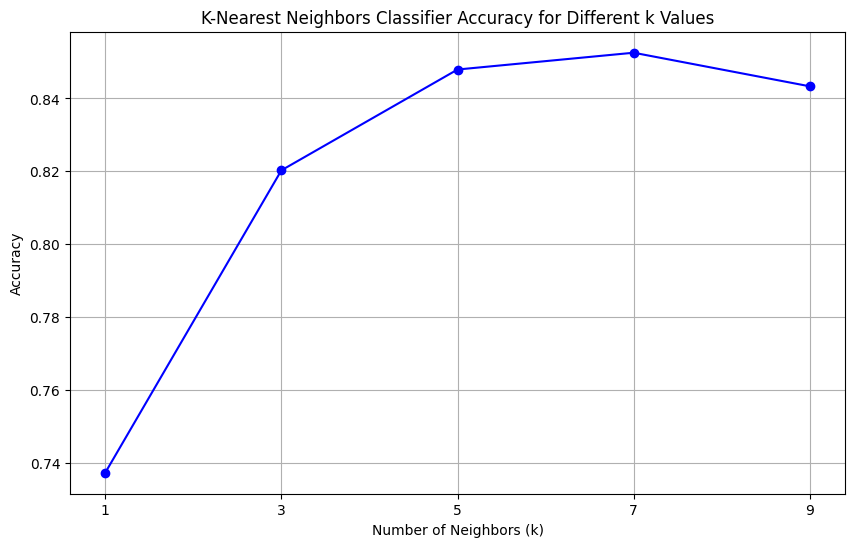

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, list(accuracy_results.values()), marker='o', linestyle='-', color='b')
plt.title('K-Nearest Neighbors Classifier Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()